In [1]:
import pandas as pd
import numpy as np

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data = df[['sepal length (cm)','sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## min max scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(data[['sepal length (cm)']])
data[('sepal length (cm)')] = scaler.transform(data[['sepal length (cm)']])

scaler.fit(data[['sepal width (cm)']])
data[('sepal width (cm)')] = scaler.transform(data[['sepal width (cm)']])

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_25520\1561279455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[('sepal length (cm)')] = scaler.transform(data[['sepal length (cm)']])
C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_25520\1561279455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[('sepal width (cm)')] = scaler.transform(data[['sepal width (cm)']])


In [12]:
data.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


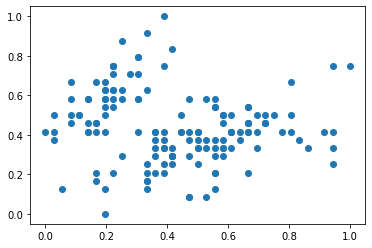

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'])

## elbow method

In [15]:
from sklearn.cluster import KMeans
k_values = range(1,10)
wcss = []
for k in k_values:
    model = KMeans(n_clusters = k)
    model.fit(data[['sepal length (cm)','sepal width (cm)']])
    wcss.append(model.inertia_)

C:\Users\damindu pahasara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[12.797757201646089,
 6.855290526033277,
 4.115194202754065,
 3.217483856523378,
 2.5662034794356643,
 2.266579673519012,
 1.8168087072573438,
 1.5319556965807026,
 1.2708146079519023]

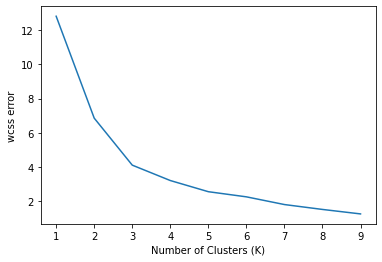

In [17]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss error')
plt.plot(k_values, wcss)

#### - best wcss error value is 3 -

In [18]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(data[['sepal length (cm)','sepal width (cm)']])

In [22]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [32]:
data['clusters'] = pred
data.head()

C:\Users\damindu pahasara\AppData\Local\Temp\ipykernel_25520\368857550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = pred


,sepal length (cm),sepal width (cm),clusters
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


In [24]:
model.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.40483539, 0.28009259],
       [0.19897959, 0.60459184]])

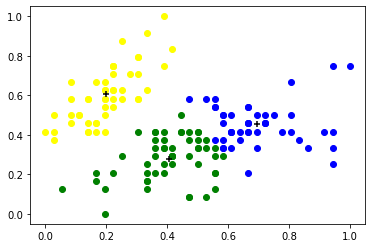

In [42]:
c1 = data[data['clusters'] == 0]
c2 = data[data['clusters'] == 1]
c3 = data[data['clusters'] == 2]

plt.scatter(c1['sepal length (cm)'],c1['sepal width (cm)'],color='blue')
plt.scatter(c2['sepal length (cm)'],c2['sepal width (cm)'],color='green')
plt.scatter(c3['sepal length (cm)'],c3['sepal width (cm)'],color='yellow')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='+')
